# Physical Model

We will set $\hbar=1$ for convenience. Also we will follow from here the notation from Python for matrices and arrays such that the first qubit will be labelled with 0 and so on:

\begin{align}
\partial_{t}\!\left\langle \hat{\sigma}_{0}^{+}\right\rangle  & =-\frac{{\rm i}}{\hbar}\left(2\overrightarrow{h}_{0}\!\cdot\!\left(\left\langle \hat{\sigma}_{0}^{z}\right\rangle ,{\rm i}\left\langle \hat{\sigma}_{0}^{z}\right\rangle ,-\left\langle \hat{\sigma}_{0}^{+}\right\rangle \right)\!+\left(2\left(A_{01}^{xx}+A_{10}^{xx}+{\rm i}\left(A_{01}^{yx}+A_{10}^{xy}\right)\right){\rm Re}\left(\left\langle \hat{\sigma}_{0}^{z}\right\rangle \left\langle \hat{\sigma}_{1}^{+}\right\rangle \right)+2\left(A_{01}^{xy}+A_{10}^{yx}+{\rm i}\left(A_{01}^{yy}+A_{10}^{yy}\right)\right){\rm Im}\left(\left\langle \hat{\sigma}_{0}^{z}\right\rangle \left\langle \hat{\sigma}_{1}^{+}\right\rangle \right)\right.\right.\\
 & \,\,\,\,\,\,\left.+2\left(A_{01}^{xz}+A_{10}^{zx}+{\rm i}\left(A_{01}^{yz}+A_{10}^{zy}\right)\right)\left\langle \hat{\sigma}_{0}^{z}\right\rangle \left\langle \hat{\sigma}_{1}^{z}\right\rangle -2\left(A_{01}^{zz}+A_{10}^{zz}\right)\left\langle \hat{\sigma}_{0}^{+}\right\rangle \left\langle \hat{\sigma}_{1}^{z}\right\rangle -\left(A_{01}^{zx}+A_{10}^{xz}-{\rm i}\left(A_{01}^{zy}+A_{10}^{yz}\right)\right)\left\langle \hat{\sigma}_{0}^{+}\right\rangle \left\langle \hat{\sigma}_{1}^{+}\right\rangle -\left(A_{01}^{zx}+A_{10}^{xz}+{\rm i}\left(A_{01}^{zy}+A_{10}^{yz}\right)\right)\left\langle \hat{\sigma}_{0}^{+}\right\rangle \left\langle \hat{\sigma}_{1}^{+}\right\rangle ^{*}\right)\\
 & \,\,\,\,\,\,\left.-2{\rm i}\left(\left(A_{00}^{xy}-A_{00}^{yx}\right)\left\langle \hat{\sigma}_{0}^{+}\right\rangle -\left(A_{00}^{yz}-A_{00}^{zy}+{\rm i}\left(A_{00}^{zx}-A_{00}^{xz}\right)\right)\left\langle \hat{\sigma}_{0}^{z}\right\rangle \right)\right)-4\left(\gamma_{+}+\gamma_{-}+\gamma_{z}\right)\left\langle \hat{\sigma}_{0}^{+}\right\rangle ,\\
\partial_{t}\!\left\langle \hat{\sigma}_{0}^{z}\right\rangle  & =\frac{1}{\hbar}\!\left(2\!\overrightarrow{h}_{0}\!\cdot\!\left({\rm Im}\left(\left\langle \hat{\sigma}_{0}^{+}\right\rangle \right),-{\rm Re}\left(\left\langle \hat{\sigma}_{0}^{+}\right\rangle \right),0\right)+\left(\left(A_{01}^{xx}+A_{10}^{xx}+A_{01}^{yy}+A_{10}^{yy}\right){\rm Im}\left(\left\langle \hat{\sigma}_{0}^{+}\right\rangle \left\langle \hat{\sigma}_{1}^{+}\right\rangle ^{*}\right)-\left(A_{01}^{yy}-A_{01}^{xx}+A_{10}^{yy}-A_{10}^{xx}\right){\rm Im}\left(\left\langle \hat{\sigma}_{0}^{+}\right\rangle \left\langle \hat{\sigma}_{1}^{+}\right\rangle \right)\right.\right.\\
 & \,\,\,\,\,\,\left.+\left(A_{01}^{xy}-A_{01}^{yx}+A_{10}^{yx}-A_{10}^{xy}\right){\rm Re}\left(\left\langle \hat{\sigma}_{0}^{+}\right\rangle \left\langle \hat{\sigma}_{1}^{+}\right\rangle ^{*}\right)-\left(A_{01}^{xy}+A_{10}^{yx}+A_{01}^{yx}+A_{10}^{xy}\right){\rm Re}\left(\left\langle \hat{\sigma}_{0}^{+}\right\rangle \left\langle \hat{\sigma}_{1}^{+}\right\rangle \right)+2\left(A_{01}^{xz}+A_{10}^{zx}\right){\rm Im}\left(\left\langle \hat{\sigma}_{0}^{+}\right\rangle \left\langle \hat{\sigma}_{1}^{z}\right\rangle \right)-2\left(A_{01}^{yz}+A_{10}^{zy}\right){\rm Re}\left(\left\langle \hat{\sigma}_{0}^{+}\right\rangle \left\langle \hat{\sigma}_{1}^{z}\right\rangle \right)\right)\\
 & \,\,\,\,\,\,\left.+2{\rm i}\left(\left(A_{00}^{yz}-A_{00}^{zy}\right){\rm Im}\left(\left\langle \hat{\sigma}_{0}^{+}\right\rangle \right)-\left(A_{00}^{zx}-A_{00}^{xz}\right){\rm Re}\left(\left\langle \hat{\sigma}_{0}^{+}\right\rangle \right)\right)\right)+\!4\left(\gamma_{+}-\gamma_{-}\right)-8\left(\gamma_{+}+\gamma_{-}\right)\left\langle \hat{\sigma}_{0}^{z}\right\rangle ,\\
\partial_{t}\!\left\langle \hat{\sigma}_{1}^{+}\right\rangle  & =-\frac{{\rm i}}{\hbar}\left(2\overrightarrow{h}_{1}\!\cdot\!\left(\left\langle \hat{\sigma}_{1}^{z}\right\rangle ,{\rm i}\left\langle \hat{\sigma}_{1}^{z}\right\rangle ,-\left\langle \hat{\sigma}_{1}^{+}\right\rangle \right)\!+\left(2\left(A_{10}^{xx}+A_{01}^{xx}+{\rm i}\left(A_{10}^{yx}+A_{01}^{xy}\right)\right){\rm Re}\left(\left\langle \hat{\sigma}_{0}^{+}\right\rangle \left\langle \hat{\sigma}_{1}^{z}\right\rangle \right)+2\left(A_{10}^{xy}+A_{01}^{yx}+{\rm i}\left(A_{10}^{yy}+A_{01}^{yy}\right)\right){\rm Im}\left(\left\langle \hat{\sigma}_{0}^{+}\right\rangle \left\langle \hat{\sigma}_{1}^{z}\right\rangle \right)\right.\right.\\
 & \,\,\,\,\,\,\left.+2\left(A_{10}^{xz}+A_{01}^{zx}+{\rm i}\left(A_{10}^{yz}+A_{01}^{zy}\right)\right)\left\langle \hat{\sigma}_{0}^{z}\right\rangle \left\langle \hat{\sigma}_{1}^{z}\right\rangle -2\left(A_{10}^{zz}+A_{01}^{zz}\right)\left\langle \hat{\sigma}_{0}^{z}\right\rangle \left\langle \hat{\sigma}_{1}^{+}\right\rangle -\left(A_{10}^{zx}+A_{01}^{xz}-{\rm i}\left(A_{10}^{zy}+A_{01}^{yz}\right)\right)\left\langle \hat{\sigma}_{0}^{+}\right\rangle \left\langle \hat{\sigma}_{1}^{+}\right\rangle -\left(A_{10}^{zx}+A_{01}^{xz}+{\rm i}\left(A_{10}^{zy}+A_{01}^{yz}\right)\right)\left\langle \hat{\sigma}_{0}^{+}\right\rangle ^{*}\left\langle \hat{\sigma}_{1}^{+}\right\rangle \right)\\
 & \,\,\,\,\,\,\left.-2{\rm i}\left(\left(A_{11}^{xy}-A_{11}^{yx}\right)\left\langle \hat{\sigma}_{1}^{+}\right\rangle -\left(A_{11}^{yz}-A_{11}^{zy}+{\rm i}\left(A_{11}^{zx}-A_{11}^{xz}\right)\right)\left\langle \hat{\sigma}_{1}^{z}\right\rangle \right)\right)-4\left(\gamma_{+}+\gamma_{-}+\gamma_{z}\right)\left\langle \hat{\sigma}_{1}^{+}\right\rangle ,\\
\partial_{t}\!\left\langle \hat{\sigma}_{1}^{z}\right\rangle  & =\frac{1}{\hbar}\!\left(2\!\overrightarrow{h}_{1}\!\cdot\!\left({\rm Im}\left(\left\langle \hat{\sigma}_{1}^{+}\right\rangle \right),-{\rm Re}\left(\left\langle \hat{\sigma}_{1}^{+}\right\rangle \right),0\right)+\left(\left(A_{10}^{xx}+A_{01}^{xx}+A_{10}^{yy}+A_{01}^{yy}\right){\rm Im}\left(\left\langle \hat{\sigma}_{0}^{+}\right\rangle ^{*}\left\langle \hat{\sigma}_{1}^{+}\right\rangle \right)-\left(A_{10}^{yy}-A_{10}^{xx}+A_{01}^{yy}-A_{01}^{xx}\right){\rm Im}\left(\left\langle \hat{\sigma}_{0}^{+}\right\rangle \left\langle \hat{\sigma}_{1}^{+}\right\rangle \right)\right.\right.\\
 & \,\,\,\,\,\,\left.+\left(A_{10}^{xy}-A_{10}^{yx}+A_{01}^{yx}-A_{01}^{xy}\right){\rm Re}\left(\left\langle \hat{\sigma}_{0}^{+}\right\rangle ^{*}\left\langle \hat{\sigma}_{1}^{+}\right\rangle \right)-\left(A_{10}^{xy}+A_{01}^{yx}+A_{10}^{yx}+A_{01}^{xy}\right){\rm Re}\left(\left\langle \hat{\sigma}_{0}^{+}\right\rangle \left\langle \hat{\sigma}_{1}^{+}\right\rangle \right)+2\left(A_{10}^{xz}+A_{01}^{zx}\right){\rm Im}\left(\left\langle \hat{\sigma}_{0}^{z}\right\rangle \left\langle \hat{\sigma}_{1}^{+}\right\rangle \right)-2\left(A_{10}^{yz}+A_{01}^{zy}\right){\rm Re}\left(\left\langle \hat{\sigma}_{0}^{z}\right\rangle \left\langle \hat{\sigma}_{1}^{+}\right\rangle \right)\right)\\
 & \,\,\,\,\,\,\left.+2{\rm i}\left(\left(A_{11}^{yz}-A_{11}^{zy}\right){\rm Im}\left(\left\langle \hat{\sigma}_{1}^{+}\right\rangle \right)-\left(A_{11}^{zx}-A_{11}^{xz}\right){\rm Re}\left(\left\langle \hat{\sigma}_{1}^{+}\right\rangle \right)\right)\right)+\!4\left(\gamma_{+}-\gamma_{-}\right)-8\left(\gamma_{+}+\gamma_{-}\right)\left\langle \hat{\sigma}_{1}^{z}\right\rangle .
\end{align}

# Complex ODEINT function

In [87]:
import time
import numpy as np
from scipy.integrate import odeint


def odeintz(func, z0, t, **kwargs):
    """An odeint-like function for complex valued differential equations."""

    # Disallow Jacobian-related arguments.
    _unsupported_odeint_args = ['Dfun', 'col_deriv', 'ml', 'mu']
    bad_args = [arg for arg in kwargs if arg in _unsupported_odeint_args]
    if len(bad_args) > 0:
        raise ValueError("The odeint argument %r is not supported by "
                         "odeintz." % (bad_args[0],))

    # Make sure z0 is a numpy array of type np.complex128.
    z0 = np.array(z0, dtype=np.complex128, ndmin=1)

    def realfunc(x, t, *args):
        z = x.view(np.complex128)
        dzdt = func(z, t, *args)
        # func might return a python list, so convert its return
        # value to an array with type np.complex128, and then return
        # a np.float64 view of that array.
        return np.asarray(dzdt, dtype=np.complex128).view(np.float64)

    result = odeint(realfunc, z0.view(np.float64), t, **kwargs)

    if kwargs.get('full_output', False):
        z = result[0].view(np.complex128)
        infodict = result[1]
        return z, infodict
    else:
        z = result.view(np.complex128)
        return z

# Simulation

## Parameters

In [106]:
"""The user needs to set 2 parameters and the initial conditions of the system."""
"""In our case the parameters are the matrix h and the interaction matrix A."""
"""If the user do not set them then they will be set as 0 by default"""


#h=[[0,0,0],
#   [0,0,0]]

h=[[1, 2, 1],
   [-1,4,1]]

h=np.array(h)

"""The tensor A can be visualized as an array of matrices, regarding Axx, Axy, Axz, ...,Azx, Azy, Azz."""
""" They should be set by the user, by default if the user do not set them then we will solve the Ising model"""
"""for which Azz\neq0 and the other matrices are zero. This is a benchmark so we consider N=2, then all the matrices"""
"""will have dimension 2x2"""

Axx=[[ 0.1, 0.08],
     [ 0.08, 0.1]]

Axy=[[ 0.2, 0.04],
     [ 0.04, -0.1]]

Axz=[[ 0.1, -0.08],
     [ -0.08, 0.1]]


Ayx=[[ 0.5, 0.03],
     [ 0.03, 0.5]]

Ayy=[[ 0.1, -0.08],
     [ -0.08, 0.1]]

Ayz=[[ 0.0, 0.02],
     [ 0.02, 0.0]]

Azx=[[ 0.0, 0.01],
     [ 0.01, 0.0]]

Azy=[[ 0, 0.09],
     [ 0.09, 0]]

Azz=[[ 0.1, 0.08],
     [ 0.08, 0.1]]  #Ising model matrix!!!

A=np.array([np.array(Axx),np.array(Axy),np.array(Axz),
           np.array(Ayx),np.array(Ayy),np.array(Ayz),
           np.array(Azx),np.array(Azy),np.array(Azz)])


"""As well the user will set the dissipation parameters given by gamma+, gamma- and gammaz"""
"""A dissipation factor is considered to increase/decrease proportionally the dissipation vector"""


#Azz=[[ 1, -2],     [ 2, 1]]   #Ising model matrix!!!

#A=np.array(Azz)




Dissipation_factor=0.5#0.5

Gamma=Dissipation_factor*np.array([0.2,0.2,0.4])  #[gamma+,gamma-,gammaz]


### Initial State

In [110]:
"""We consider by defect that the system starts in |0> for all the spins. The user can set the initial state as well."""
"""Recall that |0><0|=[[1,0],[0,0]]  """

"""The benchmark suggests that our initial state should be |psi(0)>=|+>"""


#t0=time.time()



def trace(A):
    return np.trace(A)

def matmu(A,B):
    return np.matmul(A,B)


rho_init1=np.array([[1/2,1/2],[1/2,1/2]])    #density matrix |+><+|
rho_init2=np.array([[1/2,1/2],[1/2,1/2]])    #density matrix |+><+|



#rho_init1=np.array([[1,0],[0,0]])    #By default
#rho_init2=np.array([[1,0],[0,0]])    #By default


sigma_p= np.array([[0,2],[0,0]])
sigma_z= np.array([[1,0],[0,-1]])


##Initial values one operator

sp_init1=trace(matmu(rho_init1,sigma_p))
sz_init1=trace(matmu(rho_init1,sigma_z))
sp_init2=trace(matmu(rho_init2,sigma_p))
sz_init2=trace(matmu(rho_init2,sigma_z))



##Initial values two-operators

sp_init0p1m=trace(matmu(rho_init1,sigma_p))
sz_init1=trace(matmu(rho_init1,sigma_z))
sp_init2=trace(matmu(rho_init2,sigma_p))
sz_init2=trace(matmu(rho_init2,sigma_z))




z0=np.array([sp_init1,sz_init1,sp_init2,sz_init2])


init_time=0
final_time=5/Dissipation_factor
steps=1000


#t1=time.time()

#print(t1-t0)

In [111]:
#t0=time.time()

def cj(z): 
    return z.conjugate()

def real(z): 
    return z.real

def imag(z): 
    return z.imag


def dot_p(v1,v2):
    return np.dot(v1,v2)


if __name__ == "__main__":

    # Define the right-hand-side of the differential equation.
    def zfunc(z, t, K, L):
        p0, z0, p1, z1 = z
        
        
        def tin(a):
            if a=="xx":
                return 0
            elif a=="xy":
                return 1
            elif a=="xz" :
                return 2
            elif a=="yx":
                return 3
            elif a=="yy":
                return 4
            elif a=="yz":
                return 5
            elif a=="zx":
                return 6
            elif a=="zy":
                return 7
            elif a=="zz":
                return 8
        
        
        g_plus0=[z0,1j*z0,-p0]
        g_z0=[imag(p0),-real(p0),0]
        g_plus1=[z1,1j*z1,-p1]
        g_z1=[imag(p1),-real(p1),0]
        
        
        #Dot products
        
        dotp_h0= dot_p(h[0],g_plus0)
        dotz_h0 = dot_p(h[0],g_z0)
        dotp_h1 = dot_p(h[1],g_plus1)
        dotz_h1 = dot_p(h[1],g_z1)
        
        Tensorp0 =          2*(A[tin("xx")][0][1]+A[tin("xx")][1][0]+1j*(A[tin("yx")][0][1]+A[tin("xy")][1][0]))*real(z0*p1)
        Tensorp0=Tensorp0+ 2*(A[tin("xy")][0][1]+A[tin("yx")][1][0]+1j*(A[tin("yy")][0][1]+A[tin("yy")][1][0]))*imag(z0*p1)
        Tensorp0=Tensorp0+ 2*(A[tin("xz")][0][1]+A[tin("zx")][1][0]+1j*(A[tin("yz")][0][1]+A[tin("zy")][1][0]))*z0*z1
        Tensorp0=Tensorp0+ -2*(A[tin("zz")][0][1]+A[tin("zz")][1][0])*p0*z1
        Tensorp0=Tensorp0+ -(A[tin("zx")][0][1]+A[tin("xz")][1][0]-1j*(A[tin("zy")][0][1]+A[tin("yz")][1][0])) *p0*p1
        Tensorp0=Tensorp0+ -(A[tin("zx")][0][1]+A[tin("xz")][1][0]+1j*(A[tin("zy")][0][1]+A[tin("yz")][1][0])) *p0*cj(p1)
        Tensorp0=Tensorp0+ -2j*( (A[tin("xy")][0][0]-A[tin("yx")][0][0])*p0-( A[tin("yz")][0][0]-A[tin("zy")][0][0]+1j*(A[tin("zx")][0][0]-A[tin("xz")][0][0])  )*z0  )
       
        
        
        Tensorz0 =          (A[tin("xx")][0][1]+A[tin("xx")][1][0]+A[tin("yy")][0][1]+A[tin("yy")][1][0])*imag(p0*cj(p1))
        Tensorz0= Tensorz0+ -( A[tin("yy")][0][1]-A[tin("xx")][0][1]+A[tin("yy")][1][0]-A[tin("yy")][1][0] )*imag(p0*p1)
        Tensorz0= Tensorz0+ +( A[tin("xy")][0][1]-A[tin("yx")][0][1]+A[tin("yx")][1][0]-A[tin("xy")][1][0] )*real(p0*cj(p1))
        Tensorz0= Tensorz0+ -( A[tin("xy")][0][1]+A[tin("yx")][0][1]+A[tin("yx")][1][0]+A[tin("xy")][1][0] )*real(p0*p1)
        Tensorz0= Tensorz0+ 2*(A[tin("xz")][0][1]+A[tin("zx")][1][0])*imag(p0*z1)-2*(A[tin("yz")][0][1]+A[tin("zy")][1][0])*real(p0*z1)
        Tensorz0= Tensorz0+ 2j*((A[tin("yz")][0][0] - A[tin("zy")][0][0] )*imag(p0)- ( A[tin("zx")][0][0] - A[tin("xz")][0][0] )*real(p0)   )
        
        
        
        Tensorp1 =          2*(A[tin("xx")][1][0]+A[tin("xx")][0][1]+1j*(A[tin("yx")][1][0]+A[tin("xy")][0][1]))*real(z1*p0)
        Tensorp1=Tensorp1+ 2*(A[tin("xy")][1][0]+A[tin("yx")][0][1]+1j*(A[tin("yy")][1][0]+A[tin("yy")][0][1]))*imag(z1*p0)
        Tensorp1=Tensorp1+ 2*(A[tin("xz")][1][0]+A[tin("zx")][0][1]+1j*(A[tin("yz")][1][0]+A[tin("zy")][0][1]))*z1*z0
        Tensorp1=Tensorp1+ -2*(A[tin("zz")][1][0]+A[tin("zz")][0][1])*p1*z0
        Tensorp1=Tensorp1+ -(A[tin("zx")][1][0]+A[tin("xz")][0][1]-1j*(A[tin("zy")][1][0]+A[tin("yz")][0][1])) *p1*p0
        Tensorp1=Tensorp1+ -(A[tin("zx")][1][0]+A[tin("xz")][0][1]+1j*(A[tin("zy")][1][0]+A[tin("yz")][0][1])) *p1*cj(p0)
        Tensorp1=Tensorp1+ -2j*( (A[tin("xy")][1][1]-A[tin("yx")][1][1])*p1-( A[tin("yz")][1][1]-A[tin("zy")][1][1]+1j*(A[tin("zx")][1][1]-A[tin("xz")][1][1])  )*z1  )
       
        
        Tensorz1 =          (A[tin("xx")][1][0]+A[tin("xx")][0][1]+A[tin("yy")][1][0]+A[tin("yy")][0][1])*imag(p1*cj(p0))
        Tensorz1= Tensorz1+ -( A[tin("yy")][1][0]-A[tin("xx")][1][0]+A[tin("yy")][0][1]-A[tin("yy")][0][1] )*imag(p1*p0)
        Tensorz1= Tensorz1+ +( A[tin("xy")][1][0]-A[tin("yx")][1][0]+A[tin("yx")][0][1]-A[tin("xy")][0][1] )*real(p1*cj(p0))
        Tensorz1= Tensorz1+ -( A[tin("xy")][1][0]+A[tin("yx")][1][0]+A[tin("yx")][0][1]+A[tin("xy")][0][1] )*real(p1*p0)
        Tensorz1= Tensorz1+ 2*(A[tin("xz")][1][0]+A[tin("zx")][0][1])*imag(p1*z0)-2*(A[tin("yz")][1][0]+A[tin("zy")][0][1])*real(p1*z0)
        Tensorz1= Tensorz1+ 2j*((A[tin("yz")][1][1] - A[tin("zy")][1][1] )*imag(p1)- ( A[tin("zx")][1][1] - A[tin("xz")][1][1] )*real(p1)   )
        
            
        
    
        
        dp0dt=-1j*( 2*dotp_h0 + Tensorp0  )  -4*(np.sum(Gamma))*p0
        dz0dt=dotz_h0 + Tensorz0 -8*(Gamma[0]+Gamma[1])*z0 + 4*(Gamma[0]-Gamma[1])  
        dp1dt=-1j*( 2*dotp_h1 + Tensorp1  )   -4*(np.sum(Gamma))*p1
        dz1dt=dotz_h1 + Tensorz1 -8*(Gamma[0]+Gamma[1])*z1 + 4*(Gamma[0]-Gamma[1]) 
        
        
        
        return [dp0dt, dz0dt, dp1dt, dz1dt] 

    # Set up the inputs and call odeintz to solve the system.
    t = np.linspace(init_time, final_time, steps)
    K = 3
    L = 1
    z, infodict = odeintz(zfunc, z0, t, args=(K,L), full_output=True)
    
#t1=time.time()
#print(t1-t0)

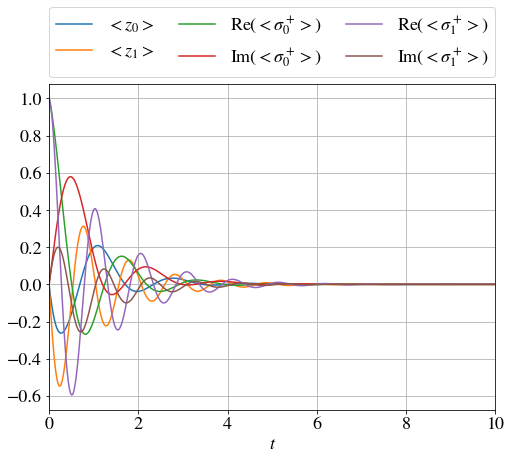

In [112]:
import matplotlib.pyplot as plt


import matplotlib
matplotlib.rcParams['text.usetex'] = False
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 18
matplotlib.rcParams['figure.figsize'] = (8.0, 6.0)

#plt.plot(t, z[:,0].imag, label='z1.imag')


plt.clf()
plt.plot(t,np.real(z[:,1]),label='$<z_0>$')
plt.plot(t,np.real(z[:,3]),label='$<z_1>$')
plt.plot(t,np.real(z[:,0]),label='Re$(<\sigma_0^+>)$')
plt.plot(t,np.imag(z[:,0]),label='Im$(<\sigma_0^+>)$')
plt.plot(t,np.real(z[:,2]),label='Re$(<\sigma_1^+>)$')
plt.plot(t,np.imag(z[:,2]),label='Im$(<\sigma_1^+>)$')
plt.xlabel('$t$')
plt.xlim(0,final_time)
plt.grid(True)
plt.legend(loc='lower right')
#plt.title("Evolution of Expected Values for N=2")

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=3, mode="expand", borderaxespad=0.)

plt.show()